In [2]:
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl


# 基础绘图设置 from yzhang
mpl.rcParams["font.size"] = 10

mpl.rcParams['xtick.direction'] = 'in'  # 将 x-axis 的刻度线方向设置向内
mpl.rcParams['ytick.direction'] = 'in'  # 将 y-axis 的刻度线方向设置向内

mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True

mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

mpl.rcParams["legend.markerscale"] = 1

In [3]:
data = pd.read_csv("FLFE.csv")
data = data[["lattice_name", "v_max^-1",
             "CPP+GLI F_excess^N", "CPP+GLI F_excess^N error",
             "hoomd+GLI F_excess^N", "hoomd+GLI F_excess^N error",
             "paper F_excess^N", "paper F_excess^N error"]]
data

,lattice_name,v_max^-1,CPP+GLI F_excess^N,CPP+GLI F_excess^N error,hoomd+GLI F_excess^N,hoomd+GLI F_excess^N error,paper F_excess^N,paper F_excess^N error
0,fcc 3x3x6,0.027259,5.884517,0.001764,5.891097,0.005389,5.8766,0.0039
1,fcc 3x3x12,0.027259,5.892627,0.001638,5.896468,0.004690,5.8799,0.0008
2,fcc 3x4x6,0.027259,5.896754,0.002782,5.901676,0.006870,5.8912,0.0028
3,fcc 4x4x6,0.011500,5.905618,0.001910,5.908918,0.005233,5.9047,0.0030
4,fcc 4x4x12,0.011500,5.911935,0.001744,5.915128,0.003287,5.9030,0.0030
5,fcc 6x6x6,0.009638,5.914773,0.001536,5.916815,0.005246,5.9159,0.0010
6,fcc cubic 32,0.032527,5.862702,0.034661,5.868417,0.008391,5.8644,0.0030
7,fcc cubic 108,0.009638,5.915479,0.012750,5.914206,0.005334,5.9117,0.0030
8,fcc cubic 256,0.004066,5.918061,0.011512,5.918900,0.003518,5.9208,0.0021


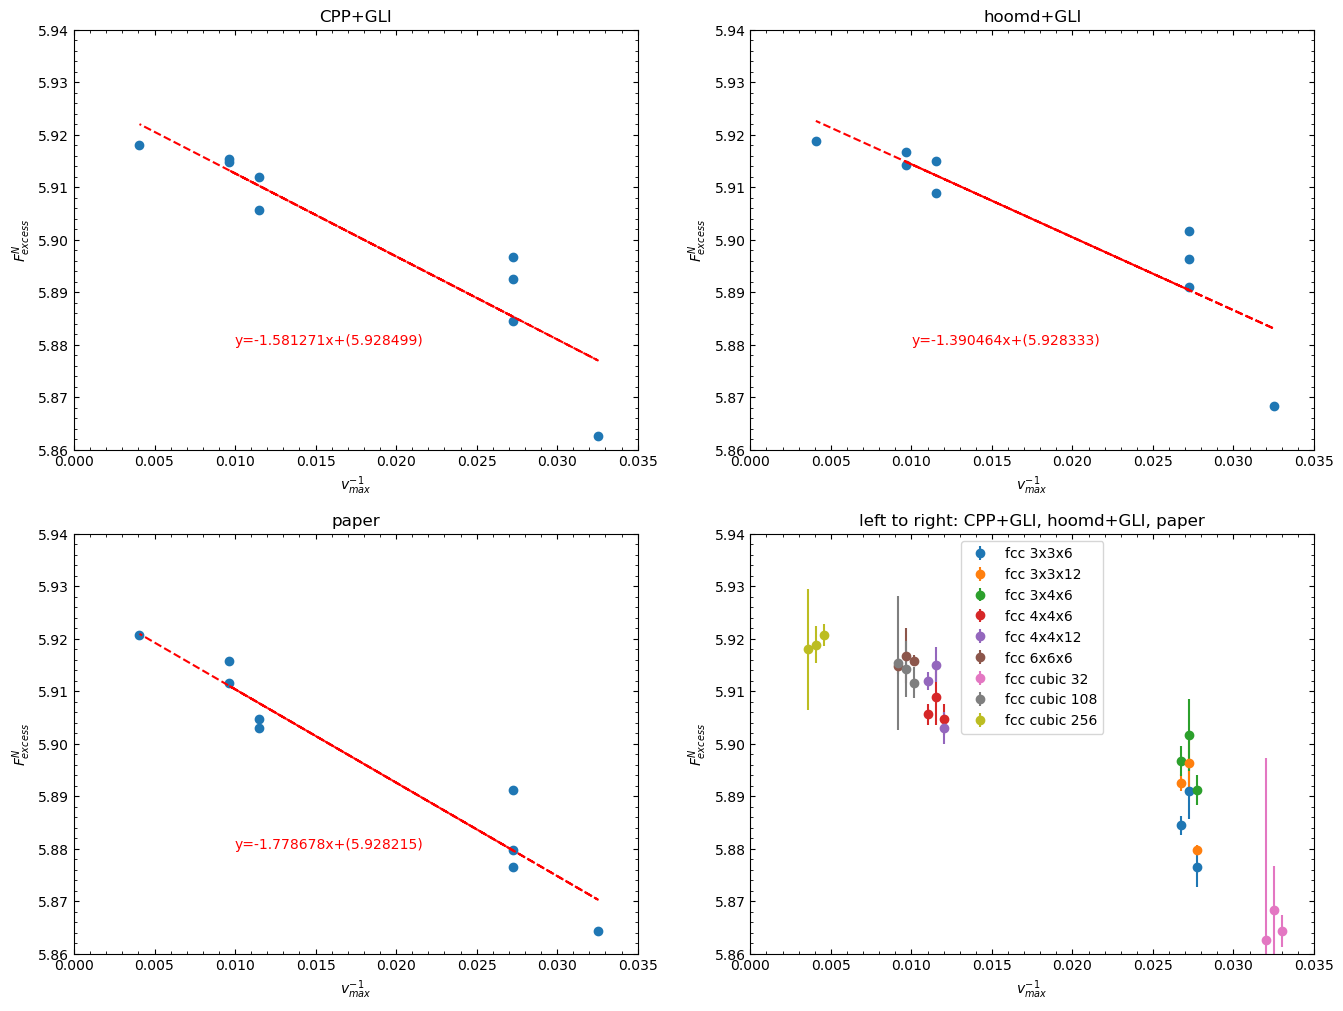

In [5]:
fig, axs = plt.subplots(
    nrows=2, ncols=2,
    figsize=(16, 12)
)

# subplot 1
axs[0, 0].set_title('CPP+GLI')
axs[0, 0].set_xlim(0, 0.035)
axs[0, 0].set_ylim(5.86, 5.94)
axs[0, 0].set_xlabel('$v_{max}^{-1}$')
axs[0, 0].set_ylabel('$F_{excess}^{N}$')

axs[0, 0].scatter(
    data["v_max^-1"].values.tolist(),
    data["CPP+GLI F_excess^N"].values.tolist()
)

z = np.polyfit(data["v_max^-1"], data["CPP+GLI F_excess^N"], 1)
p = np.poly1d(z)
axs[0, 0].plot(data["v_max^-1"], p(data["v_max^-1"]), "r--")
axs[0, 0].text(0.01, 5.88, "y=%.6fx+(%.6f)" % (z[0], z[1]), fontsize=10, color="r")


# subplot 2
axs[0, 1].set_title('hoomd+GLI')
axs[0, 1].set_xlim(0, 0.035)
axs[0, 1].set_ylim(5.86, 5.94)
axs[0, 1].set_xlabel('$v_{max}^{-1}$')
axs[0, 1].set_ylabel('$F_{excess}^{N}$')

axs[0, 1].scatter(
    data["v_max^-1"].values.tolist(),
    data["hoomd+GLI F_excess^N"].values.tolist()
)

z = np.polyfit(data["v_max^-1"], data["hoomd+GLI F_excess^N"], 1)
p = np.poly1d(z)
axs[0, 1].plot(data["v_max^-1"], p(data["v_max^-1"]), "r--")
axs[0, 1].text(0.01, 5.88, "y=%.6fx+(%.6f)" % (z[0], z[1]), fontsize=10, color="r")


# subplot 3
axs[1, 0].set_title('paper')
axs[1, 0].set_xlim(0, 0.035)
axs[1, 0].set_ylim(5.86, 5.94)
axs[1, 0].set_xlabel('$v_{max}^{-1}$')
axs[1, 0].set_ylabel('$F_{excess}^{N}$')

axs[1, 0].scatter(
    data["v_max^-1"].values.tolist(),
    data["paper F_excess^N"].values.tolist()
)

z = np.polyfit(data["v_max^-1"], data["paper F_excess^N"], 1)
p = np.poly1d(z)
axs[1, 0].plot(data["v_max^-1"], p(data["v_max^-1"]), "r--")
axs[1, 0].text(0.01, 5.88, "y=%.6fx+(%.6f)" % (z[0], z[1]), fontsize=10, color="r")


# subplot 4
axs[1, 1].set_title('left to right: CPP+GLI, hoomd+GLI, paper')
axs[1, 1].set_xlim(0, 0.035)
axs[1, 1].set_ylim(5.86, 5.94)
axs[1, 1].set_xlabel('$v_{max}^{-1}$')
axs[1, 1].set_ylabel('$F_{excess}^{N}$')

# 9 可区分的颜色
colors = itertools.cycle(
    ['#1f77b4', '#ff7f0e', '#2ca02c',
     '#d62728', '#9467bd', '#8c564b',
     '#e377c2', '#7f7f7f', '#bcbd22']
)

delta = np.array(0.0005)

# 按照 lattice 分组，每分别绘制来自 CPP hoomd paper 的 errorbar
for lattice in data["lattice_name"].values.tolist():
    axs[1, 1].errorbar(
        np.array(data[data["lattice_name"] == lattice]["v_max^-1"].values.tolist())-delta,
        np.array(data[data["lattice_name"] == lattice]["CPP+GLI F_excess^N"].values.tolist()),
        yerr=np.array(data[data["lattice_name"] == lattice]["CPP+GLI F_excess^N error"].values.tolist()),
        fmt='o', color=next(colors),
        label=lattice
    )

for lattice in data["lattice_name"].values.tolist():
    axs[1, 1].errorbar(
        np.array(data[data["lattice_name"] == lattice]["v_max^-1"].values.tolist()),
        np.array(data[data["lattice_name"] == lattice]["hoomd+GLI F_excess^N"].values.tolist()),
        yerr=data[data["lattice_name"] == lattice]["hoomd+GLI F_excess^N error"].values.tolist(),
        fmt='o', color=next(colors)
    )

for lattice in data["lattice_name"].values.tolist():
    axs[1, 1].errorbar(
        np.array(data[data["lattice_name"] == lattice]["v_max^-1"].values.tolist())+delta,
        data[data["lattice_name"] == lattice]["paper F_excess^N"].values.tolist(),
        yerr=data[data["lattice_name"] == lattice]["paper F_excess^N error"].values.tolist(),
        fmt='o', color=next(colors)
    )


plt.legend(loc='upper center')
plt.show()
# plt.savefig("FLFE.png", dpi=300, bbox_inches='tight')